# Phyiscs Problems - Lectures 22 & 23 - Homework 10

FALL 2024


### 1) Altitude of a satellite

A satellite is to be launched into a circular orbit around the Earth so that it orbits the planet once every T seconds.

The altitude h above the Earth’s surface that the satellite must have is:

$$h = \left( \frac{G M T^2}{4\pi^2} \right)^{1/3} - R$$

where $G = 6.67 \times 10^{-11}$ m$^3$ kg$^{-1}$ s$^{-2}$
is Newton's gravitational constant, $M = 5.97 \times 10^{24}$ kg is the mass of the Earth, and $R = 6371$ km is its radius.

#### Write a function that asks the user to enter the desired value of T and then calculates and prints out the correct altitude in meters.


In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
G = 6.67e-11
M = 5.97e24
R = 6371 * 1000

def altitude(T):
    #code here
    h = (G*M*T**2 / (4*np.pi**2))**(1/3) - R
    return h

# TestT = 3000
# altitude(TestT)

Use your program to calculate the altitudes of satellites that orbit the Earth once
a day (so-called “geosynchronous” orbit), once every 90 minutes, and once every
45 minutes. What do you conclude from the last of these calculations?





In [3]:
geosync = 24*60*60
hourhalf = 90*60
min45 = 45*60
print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(hourhalf),
      ";  45 min: Altitude =",altitude(min45))

24 hours: Altitude = 35855910.176174976 ; 90 min: Altitude = 279321.6253728606 ;  45 min: Altitude = -2181559.8978108233


Technically a geosynchronous satellite is one that orbits the Earth once persidereal
day, which is 23.93 hours, not 24 hours. Why is this? And how much difference
will it make to the altitude of the satellite?

In [4]:
persidereal = 23.93*60*60
print("24 hours: Altitude =",altitude(geosync), "; 90 min: Altitude =",altitude(persidereal))

24 hours: Altitude = 35855910.176174976 ; 90 min: Altitude = 35773762.329895645


#### Modify your code to calculate the times from 0.5 hour  to 30 days, in steps of 0.5 hours.   Then plot those data points (time vs h) with properly labled axes.  Plot orbits with height below 0 as red, and plots positive heights with times less than geosynchronous in blue and those longer in green.

Text(0.5, 1.0, 'Orbital height vs period')

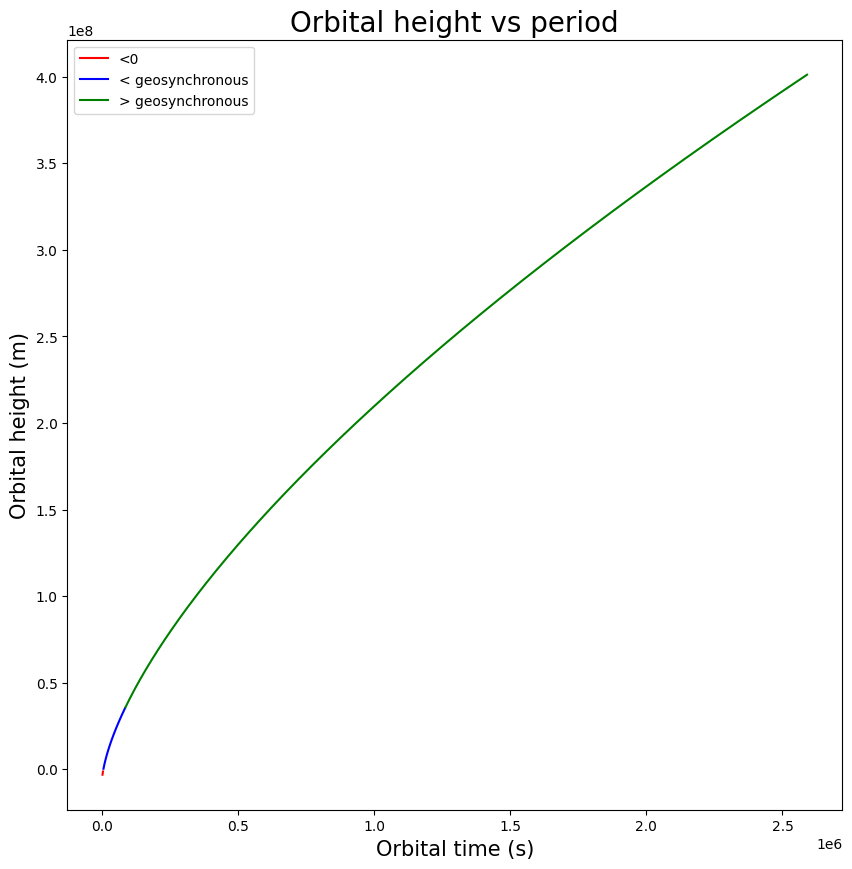

In [5]:
times = np.arange(0.5*60*60, 30*24*60*60, 0.5*60*60)
heightsY = altitude(times)
redTimes = []
blueTimes = []
greenTimes = []
np.array(redTimes)
np.array(blueTimes)
np.array(greenTimes)

for i in range(len(heightsY)):
    if heightsY[i] < 0:
        redTimes.append(times[i])
    elif heightsY[i] > 0 and heightsY[i] < altitude(persidereal):
        blueTimes.append(times[i])
    else:
        greenTimes.append(times[i])


fig1 = plt.figure(figsize=(10,10))
ax = fig1.add_subplot(111)
ax.plot(redTimes,altitude(np.array(redTimes)), c = 'r')
ax.plot(blueTimes,altitude(np.array(blueTimes)), c = 'b')
ax.plot(greenTimes,altitude(np.array(greenTimes)), c = 'g')
ax.legend(['<0','< geosynchronous', '> geosynchronous'])
plt.xlabel('Orbital time (s)', size = 15)
plt.ylabel('Orbital height (m)', size = 15)
plt.title('Orbital height vs period', size = 20)


### 2) Special Relativity

A spaceship travels from Earth in a straight line at a (relativistic)
speed $v$ to another planet $x$ light years away. Write a program to ask
the user for the value of $x$ and the speed $v$ as a fraction of the speed
of light, then print out the time in years that the spaceship takes to
reach its destination (a) in the rest frame of an observer on Earth
and (b) as perceived by a passenger on board the ship.

$$x' = \gamma (x - vt)$$

$$t' = \gamma \left(t - \frac{v x}{c^2}\right)$$

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$


In [17]:
c = 3e8
x = 10 #rest frame in distance in lightyears
t = 5  #rest frame time that has surpassed

def gamma(velocity):
  if velocity == c:
    return
  else:
    return (1/(np.sqrt(1-(velocity**2/c**2))))

def xPrime(velocity):
  return gamma(velocity)*(x-velocity*t)

def tPrime(velocity):
  return gamma(velocity)*(t-velocity*x/(c**2))



#### Use your program to calculate the answers for a planet 10 light years away with $v = 0.90c$,  $v = 0.98c$, $v = 0.999c$.

In [21]:
print(xPrime(0.9*c),tPrime(0.98*c),tPrime(0.99*c))
print(tPrime(0.9*c),tPrime(0.98*c),tPrime(0.99*c))

-3097112384.311011 25.125945217324134 35.44406001648597
11.47078662470337 25.125945217324134 35.44406001648597


### 3) The quadratic equation

 Write a program that takes as input three numbers, $a$, $b$, and $c$, and prints out the two solutions to the quadratic equation $ax^2 + bx + c = 0$ using the standard
formula:

$$x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$$

Use your program to compute the solutions of $0.001x^2 + 1000x + 0.001 = 0$.

In [23]:
def quadratic(a,b,c):
  x1 = (-b + np.sqrt(b**2-4*a*c))/(2*a)
  x2 = (-b - np.sqrt(b**2-4*a*c))/(2*a)
  return x1, x2

print("the roots are " + str(quadratic(0.001,1000,0.001)))

the roots are (-9.999894245993346e-07, -999999.999999)


There is another way to write the solutions to a quadratic equation. Multiplying top and bottom of the solution above by $-b \mp \sqrt{b^2 - 4ac}$, show that the solutions
can also be written as:

$$x = \frac{2c}{-b \mp \sqrt{b^2 - 4ac}}$$

Add further lines to your program to print these values in addition to the earlier ones and again use the program to solve $0.001x^2 + 1000x + 0.001 = 0$. What do you see? How do you explain it?

In [27]:
def quadratic2(a,b,c):
  x1 = 2*c/(-b-np.sqrt(b**2-4*a*c))
  x2 = 2*c/(-b+np.sqrt(b**2-4*a*c))

print("the roots from method 1 are " + str(quadratic(0.001,1000,0.001)))
print("the roots from method 2 are " + str(quadratic2(0.001,1000,0.001)))
#This is most likely due to the denominator. If there's a floating point error then the numerator divided by the denominator has too long of a float

the roots from method 1 are (-9.999894245993346e-07, -999999.999999)
the roots from method 2 are None


Using what you have learned, write a new program that calculates both roots of a quadratic equation accurately in all cases.

__(NOTE: MANY Online quadratic equation are WRONG, so careful how you check!!!).__

In [33]:
def quadratic3(a,b,c):
  denom1 = -b-np.sqrt(b**2-4*a*c)
  denom2 = -b+np.sqrt(b**2-4*a*c)
  x1 = 2*c/denom1
  x2 = 2*c/denom2
  return(x1,x2)

print("The new roots are " + str(quadratic3(0.001,1000,0.001)))

The new roots are (-1.000000000001e-06, -1000010.5755125057)
